In [46]:
pip install split-folders

DEPRECATION: Loading egg at /Users/aayush/anaconda3/lib/python3.11/site-packages/huggingface_hub-0.23.0-py3.8.egg is deprecated. pip 24.3 will enforce this behaviour change. A possible replacement is to use pip for package installation.. Discussion can be found at https://github.com/pypa/pip/issues/12330
Note: you may need to restart the kernel to use updated packages.


In [340]:
import pandas as pd
import numpy as np 
from datasets import load_dataset
import os
from tqdm import tqdm
from PIL import Image
import io
tqdm.pandas()
from pandarallel import pandarallel
pandarallel.initialize(nb_workers=9,progress_bar = True)
import splitfolders
import tensorflow
from tensorflow.keras.preprocessing import image_dataset_from_directory
from tensorflow.keras.models import Sequential,Model
from tensorflow.keras.layers import Conv2D,Dense,MaxPooling2D,BatchNormalization,Input,Flatten,Rescaling,Dropout,Activation,GlobalMaxPooling2D,AveragePooling2D,LeakyReLU
from tensorflow.keras.metrics import F1Score
from tensorflow.keras.initializers import LecunNormal,HeNormal,GlorotNormal
from tensorflow.keras.regularizers import L1,L2,L1L2
from tensorflow.keras.activations import relu
from tensorflow.keras.optimizers import Adam,Nadam
from tensorflow.keras.applications import VGG16,ResNet50V2,InceptionV3,EfficientNetV2B0,EfficientNetV2B1

INFO: Pandarallel will run on 9 workers.
INFO: Pandarallel will use standard multiprocessing data transfer (pipe) to transfer data between the main process and workers.


In [4]:
paths = os.listdir('/Users/aayush/Downloads/wikiart')
del paths[12]
paths

['train-00042-of-00072.parquet',
 'train-00019-of-00072.parquet',
 'train-00027-of-00072.parquet',
 'train-00006-of-00072.parquet',
 'train-00038-of-00072.parquet',
 'train-00063-of-00072.parquet',
 'train-00012-of-00072.parquet',
 'train-00049-of-00072.parquet',
 'train-00056-of-00072.parquet',
 'train-00068-of-00072.parquet',
 'train-00033-of-00072.parquet',
 'train-00052-of-00072.parquet',
 'train-00037-of-00072.parquet',
 'train-00009-of-00072.parquet',
 'train-00028-of-00072.parquet',
 'train-00016-of-00072.parquet',
 'train-00002-of-00072.parquet',
 'train-00067-of-00072.parquet',
 'train-00059-of-00072.parquet',
 'train-00046-of-00072.parquet',
 'train-00023-of-00072.parquet',
 'train-00062-of-00072.parquet',
 'train-00007-of-00072.parquet',
 'train-00039-of-00072.parquet',
 'train-00018-of-00072.parquet',
 'train-00026-of-00072.parquet',
 'train-00043-of-00072.parquet',
 'train-00032-of-00072.parquet',
 'train-00057-of-00072.parquet',
 'train-00069-of-00072.parquet',
 'train-00

In [5]:
paths = sorted(paths)
paths [:50]

['train-00000-of-00072.parquet',
 'train-00001-of-00072.parquet',
 'train-00002-of-00072.parquet',
 'train-00003-of-00072.parquet',
 'train-00004-of-00072.parquet',
 'train-00005-of-00072.parquet',
 'train-00006-of-00072.parquet',
 'train-00007-of-00072.parquet',
 'train-00008-of-00072.parquet',
 'train-00009-of-00072.parquet',
 'train-00010-of-00072.parquet',
 'train-00011-of-00072.parquet',
 'train-00012-of-00072.parquet',
 'train-00013-of-00072.parquet',
 'train-00014-of-00072.parquet',
 'train-00015-of-00072.parquet',
 'train-00016-of-00072.parquet',
 'train-00017-of-00072.parquet',
 'train-00018-of-00072.parquet',
 'train-00019-of-00072.parquet',
 'train-00020-of-00072.parquet',
 'train-00021-of-00072.parquet',
 'train-00022-of-00072.parquet',
 'train-00023-of-00072.parquet',
 'train-00024-of-00072.parquet',
 'train-00025-of-00072.parquet',
 'train-00026-of-00072.parquet',
 'train-00027-of-00072.parquet',
 'train-00028-of-00072.parquet',
 'train-00029-of-00072.parquet',
 'train-00

In [68]:
total = pd.read_parquet('/Users/aayush/Downloads/wikiart/'+paths[0])

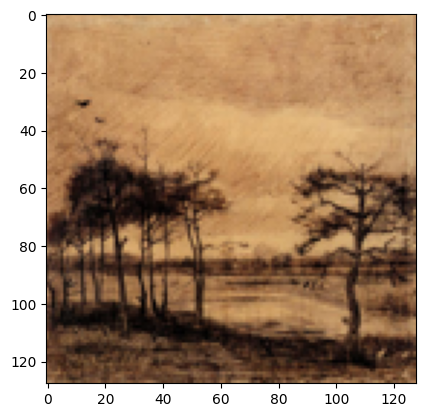

In [79]:
i = Image.open(io.BytesIO(total.loc[0,'image']['bytes']))
i.size
i
import matplotlib.pyplot as plt
plt.imshow(i.resize((128,128)))

In [80]:
imNum = 0
for path in tqdm(paths):
    df = pd.read_parquet('/Users/aayush/Downloads/wikiart/'+path)
    df.parallel_apply(lambda x:Image.open(io.BytesIO(x['image']['bytes'])).resize((128,128)).save('/Users/aayush/Library/Mobile Documents/com~apple~CloudDocs/UChicago/Machine Learning/wikiartImages/'+str(x['genre'])+'/'+str(imNum)+'-'+str(x.name)+'.png'),axis = 1)
    imNum = imNum+1
    del df

  0%|          | 0/72 [00:00<?, ?it/s]

  1%|▏         | 1/72 [00:11<14:07, 11.94s/it]

  3%|▎         | 2/72 [00:22<12:59, 11.14s/it]

  4%|▍         | 3/72 [00:32<12:26, 10.82s/it]

  6%|▌         | 4/72 [00:43<12:07, 10.70s/it]

  7%|▋         | 5/72 [00:54<11:59, 10.74s/it]

  8%|▊         | 6/72 [01:05<11:54, 10.83s/it]

 10%|▉         | 7/72 [01:16<11:43, 10.82s/it]

 11%|█         | 8/72 [01:26<11:30, 10.79s/it]

 12%|█▎        | 9/72 [01:37<11:12, 10.68s/it]

 14%|█▍        | 10/72 [01:48<11:14, 10.87s/it]

 15%|█▌        | 11/72 [01:58<10:53, 10.71s/it]

 17%|█▋        | 12/72 [02:08<10:20, 10.35s/it]

 18%|█▊        | 13/72 [02:18<10:11, 10.37s/it]

 19%|█▉        | 14/72 [02:28<09:52, 10.22s/it]

 21%|██        | 15/72 [02:38<09:38, 10.16s/it]

 22%|██▏       | 16/72 [02:48<09:28, 10.15s/it]

 24%|██▎       | 17/72 [02:58<09:15, 10.09s/it]

 25%|██▌       | 18/72 [03:08<08:55,  9.91s/it]

 26%|██▋       | 19/72 [03:17<08:38,  9.78s/it]

 28%|██▊       | 20/72 [03:28<08:35,  9.92s/it]

 29%|██▉       | 21/72 [03:37<08:19,  9.79s/it]

 31%|███       | 22/72 [03:47<08:10,  9.81s/it]

 32%|███▏      | 23/72 [03:58<08:12, 10.06s/it]

 33%|███▎      | 24/72 [04:08<08:15, 10.33s/it]

 35%|███▍      | 25/72 [04:19<08:06, 10.35s/it]

 36%|███▌      | 26/72 [04:30<08:04, 10.54s/it]

 38%|███▊      | 27/72 [04:41<08:06, 10.82s/it]

 39%|███▉      | 28/72 [04:52<07:51, 10.72s/it]

 40%|████      | 29/72 [05:03<07:41, 10.73s/it]

 42%|████▏     | 30/72 [05:13<07:24, 10.57s/it]

 43%|████▎     | 31/72 [05:24<07:21, 10.77s/it]

 44%|████▍     | 32/72 [05:35<07:09, 10.75s/it]

 46%|████▌     | 33/72 [05:44<06:44, 10.38s/it]

 47%|████▋     | 34/72 [05:54<06:27, 10.18s/it]

 49%|████▊     | 35/72 [06:04<06:14, 10.13s/it]

 50%|█████     | 36/72 [06:15<06:17, 10.48s/it]

 51%|█████▏    | 37/72 [06:26<06:05, 10.44s/it]

 53%|█████▎    | 38/72 [06:37<06:06, 10.78s/it]

 54%|█████▍    | 39/72 [06:50<06:13, 11.33s/it]

 56%|█████▌    | 40/72 [07:01<05:59, 11.24s/it]

 57%|█████▋    | 41/72 [07:11<05:38, 10.93s/it]

 58%|█████▊    | 42/72 [07:21<05:22, 10.75s/it]

 60%|█████▉    | 43/72 [07:31<05:04, 10.51s/it]

 61%|██████    | 44/72 [07:42<04:56, 10.60s/it]

 62%|██████▎   | 45/72 [07:54<04:55, 10.95s/it]

 64%|██████▍   | 46/72 [08:05<04:48, 11.08s/it]

 65%|██████▌   | 47/72 [08:16<04:37, 11.11s/it]

 67%|██████▋   | 48/72 [08:27<04:20, 10.86s/it]

 68%|██████▊   | 49/72 [08:37<04:08, 10.81s/it]

 69%|██████▉   | 50/72 [08:48<03:57, 10.80s/it]

 71%|███████   | 51/72 [08:58<03:38, 10.41s/it]

 72%|███████▏  | 52/72 [09:07<03:24, 10.23s/it]

 74%|███████▎  | 53/72 [09:17<03:09,  9.95s/it]

 75%|███████▌  | 54/72 [09:26<02:56,  9.78s/it]

 76%|███████▋  | 55/72 [09:36<02:45,  9.76s/it]

 78%|███████▊  | 56/72 [09:46<02:35,  9.73s/it]

 79%|███████▉  | 57/72 [09:55<02:24,  9.63s/it]

 81%|████████  | 58/72 [10:05<02:14,  9.62s/it]

 82%|████████▏ | 59/72 [10:13<02:02,  9.40s/it]

 83%|████████▎ | 60/72 [10:22<01:51,  9.26s/it]

 85%|████████▍ | 61/72 [10:31<01:41,  9.22s/it]

 86%|████████▌ | 62/72 [10:41<01:32,  9.24s/it]

 88%|████████▊ | 63/72 [10:52<01:27,  9.69s/it]

 89%|████████▉ | 64/72 [11:02<01:20, 10.03s/it]

 90%|█████████ | 65/72 [11:13<01:10, 10.12s/it]

 92%|█████████▏| 66/72 [11:23<01:01, 10.23s/it]

 93%|█████████▎| 67/72 [11:33<00:50, 10.10s/it]

 94%|█████████▍| 68/72 [11:43<00:39,  9.95s/it]

 96%|█████████▌| 69/72 [11:53<00:30, 10.16s/it]

 97%|█████████▋| 70/72 [12:03<00:20, 10.10s/it]

 99%|█████████▊| 71/72 [12:14<00:10, 10.21s/it]

100%|██████████| 72/72 [12:24<00:00, 10.33s/it]


In [81]:
splitfolders.ratio("/Users/aayush/Library/Mobile Documents/com~apple~CloudDocs/UChicago/Machine Learning/wikiartImages", output="/Users/aayush/Library/Mobile Documents/com~apple~CloudDocs/UChicago/Machine Learning/wikiartImagesSplit",
    seed=1337, ratio=(.7, .2, .1), group_prefix=None, move=False)

Copying files: 81444 files [00:53, 1528.15 files/s]


In [ ]:
os.remove("/Users/aayush/Library/Mobile Documents/com~apple~CloudDocs/UChicago/Machine Learning/wikiartImagesSplit/train/0")
os.remove("/Users/aayush/Library/Mobile Documents/com~apple~CloudDocs/UChicago/Machine Learning/wikiartImagesSplit/train/1")
os.remove("/Users/aayush/Library/Mobile Documents/com~apple~CloudDocs/UChicago/Machine Learning/wikiartImagesSplit/train/3")
os.remove("/Users/aayush/Library/Mobile Documents/com~apple~CloudDocs/UChicago/Machine Learning/wikiartImagesSplit/train/5")
os.remove("/Users/aayush/Library/Mobile Documents/com~apple~CloudDocs/UChicago/Machine Learning/wikiartImagesSplit/train/8")
os.remove("/Users/aayush/Library/Mobile Documents/com~apple~CloudDocs/UChicago/Machine Learning/wikiartImagesSplit/train/9")
os.remove("/Users/aayush/Library/Mobile Documents/com~apple~CloudDocs/UChicago/Machine Learning/wikiartImagesSplit/val/0")
os.remove("/Users/aayush/Library/Mobile Documents/com~apple~CloudDocs/UChicago/Machine Learning/wikiartImagesSplit/val/1")
os.remove("/Users/aayush/Library/Mobile Documents/com~apple~CloudDocs/UChicago/Machine Learning/wikiartImagesSplit/val/3")
os.remove("/Users/aayush/Library/Mobile Documents/com~apple~CloudDocs/UChicago/Machine Learning/wikiartImagesSplit/val/5")
os.remove("/Users/aayush/Library/Mobile Documents/com~apple~CloudDocs/UChicago/Machine Learning/wikiartImagesSplit/val/8")
os.remove("/Users/aayush/Library/Mobile Documents/com~apple~CloudDocs/UChicago/Machine Learning/wikiartImagesSplit/val/9")
os.remove("/Users/aayush/Library/Mobile Documents/com~apple~CloudDocs/UChicago/Machine Learning/wikiartImagesSplit/val/0")
os.remove("/Users/aayush/Library/Mobile Documents/com~apple~CloudDocs/UChicago/Machine Learning/wikiartImagesSplit/test/1")
os.remove("/Users/aayush/Library/Mobile Documents/com~apple~CloudDocs/UChicago/Machine Learning/wikiartImagesSplit/test/3")
os.remove("/Users/aayush/Library/Mobile Documents/com~apple~CloudDocs/UChicago/Machine Learning/wikiartImagesSplit/test/5")
os.remove("/Users/aayush/Library/Mobile Documents/com~apple~CloudDocs/UChicago/Machine Learning/wikiartImagesSplit/test/8")
os.remove("/Users/aayush/Library/Mobile Documents/com~apple~CloudDocs/UChicago/Machine Learning/wikiartImagesSplit/test/9")

In [94]:
labs = pd.DataFrame(columns = ['genre','path'])

In [95]:
imNum = 0
for path in tqdm(paths):
    df = pd.read_parquet('/Users/aayush/Downloads/wikiart/'+path)
    df['path'] = df.apply(lambda x: str(imNum)+'-'+str(x.name)+'.png',axis = 1)
    labs = pd.concat([labs,df[['genre','path']]])
    imNum = imNum+1
    del df

100%|██████████| 72/72 [00:37<00:00,  1.91it/s]


In [98]:
labs.to_csv('labelsWikiArt.csv')

In [100]:
labs = pd.read_csv('labelsWikiArt.csv')

In [202]:
train = image_dataset_from_directory('/Users/aayush/Library/Mobile Documents/com~apple~CloudDocs/UChicago/Machine Learning/wikiArtImagesSplit/train',labels='inferred',image_size=(128,128))

Found 42921 files belonging to 5 classes.


In [203]:
test = image_dataset_from_directory('/Users/aayush/Library/Mobile Documents/com~apple~CloudDocs/UChicago/Machine Learning/wikiArtImagesSplit/test',image_size=(128,128))

Found 6137 files belonging to 5 classes.


In [204]:
val = image_dataset_from_directory('/Users/aayush/Library/Mobile Documents/com~apple~CloudDocs/UChicago/Machine Learning/wikiArtImagesSplit/val',image_size=(128,128))

Found 12261 files belonging to 5 classes.


In [201]:
list(train.take(1))[0]

2024-05-19 15:49:40.584506: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


(<tf.Tensor: shape=(32, 256, 256, 3), dtype=float32, numpy=
 array([[[[190.    , 119.    ,  55.    ],
          [187.75  , 117.    ,  54.    ],
          [183.25  , 113.    ,  52.    ],
          ...,
          [213.    , 138.    ,  40.75  ],
          [215.    , 142.    ,  44.25  ],
          [216.    , 144.    ,  46.    ]],
 
         [[191.    , 118.25  ,  54.25  ],
          [189.1875, 116.6875,  53.5625],
          [185.5625, 113.5625,  52.1875],
          ...,
          [211.5   , 136.875 ,  41.625 ],
          [213.    , 140.125 ,  44.875 ],
          [213.75  , 141.75  ,  46.5   ]],
 
         [[193.    , 116.75  ,  52.75  ],
          [192.0625, 116.0625,  52.6875],
          [190.1875, 114.6875,  52.5625],
          ...,
          [208.5   , 134.625 ,  43.375 ],
          [209.    , 136.375 ,  46.125 ],
          [209.25  , 137.25  ,  47.5   ]],
 
         ...,
 
         [[157.    , 122.75  ,  89.75  ],
          [153.375 , 121.    ,  89.75  ],
          [146.125 , 117.5   ,

In [351]:
cnn = Sequential(name = 'cnn')
cnn.add(Input(shape = (128,128,3)))
cnn.add(Rescaling(1./255))
cnn.add(Conv2D(16,(3,3),padding = 'same',activation = 'relu',kernel_initializer= HeNormal(),kernel_regularizer=L2(0.001)))
cnn.add(BatchNormalization())
cnn.add(Conv2D(16,(3,3),padding = 'same',activation = 'relu',kernel_initializer= HeNormal(),kernel_regularizer=L2(0.001)))
cnn.add(BatchNormalization())
cnn.add(AveragePooling2D((2,2)))
cnn.add(Dropout(0.5))
cnn.add(Conv2D(32,(3,3),padding = 'same',activation = 'relu',kernel_initializer = HeNormal(),kernel_regularizer=L2(0.001)))
cnn.add(BatchNormalization())
cnn.add(Dropout(0.5))
cnn.add(Conv2D(32,(3,3),padding = 'same',activation = 'relu',kernel_initializer = HeNormal(),kernel_regularizer=L2(0.001)))
cnn.add(BatchNormalization())
cnn.add(AveragePooling2D((2,2)))
cnn.add(Dropout(0.5))
cnn.add(Conv2D(16,(3,3),padding = 'same',activation = 'relu',kernel_initializer = HeNormal(),kernel_regularizer=L2(0.001)))
cnn.add(BatchNormalization())
cnn.add(Conv2D(16,(3,3),padding = 'same',activation = 'relu',kernel_initializer = HeNormal(),kernel_regularizer=L2(0.001)))
cnn.add(BatchNormalization())
cnn.add(AveragePooling2D((2,2)))
cnn.add(Dropout(0.5))
cnn.add(Flatten())
cnn.add(Dense(5,activation = 'softmax',kernel_initializer = GlorotNormal(),kernel_regularizer=L2(0.001)))
cnn.summary()
cnn.compile(loss = 'sparse_categorical_crossentropy',optimizer = Adam(learning_rate = 0.0005),metrics = ['accuracy'])

Model: "cnn"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ rescaling_61 (Rescaling)        │ (None, 128, 128, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_404 (Conv2D)             │ (None, 128, 128, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_405         │ (None, 128, 128, 16)   │            64 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_405 (Conv2D)             │ (None, 128, 128, 16)   │         2,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_406         │ (None, 128, 128, 16)   │            64 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ average_pooling2d_41            │ (None, 64, 64, 16)     │             0 │
│ (AveragePooling2D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_136 (Dropout)           │ (None, 64, 64, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_406 (Conv2D)             │ (None, 64, 64, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_407         │ (None, 64, 64, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_407 (Conv2D)             │ (None, 64, 64, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_408         │ (None, 64, 64, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ average_pooling2d_42            │ (None, 32, 32, 32)     │             0 │
│ (AveragePooling2D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_137 (Dropout)           │ (None, 32, 32, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_408 (Conv2D)             │ (None, 32, 32, 16)     │         4,624 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_409         │ (None, 32, 32, 16)     │            64 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_409 (Conv2D)             │ (None, 32, 32, 16)     │         2,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_410         │ (None, 32, 32, 16)     │            64 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ average_pooling2d_43            │ (None, 16, 16, 16)     │             0 │
│ (AveragePooling2D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_138 (Dropout)           │ (None, 16, 16, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_54 (Flatten)            │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼─────────────

 Total params: 44,597 (174.21 KB)

 Trainable params: 44,341 (173.21 KB)

 Non-trainable params: 256 (1.00 KB)

In [355]:
logs = cnn.fit(train,validation_data=(val),epochs = 10,batch_size=64)

Epoch 1/10
1342/1342 ━━━━━━━━━━━━━━━━━━━━ 389s 290ms/step - accuracy: 0.5996 - loss: 1.0798 - val_accuracy: 0.5840 - val_loss: 1.1235
Epoch 2/10
1342/1342 ━━━━━━━━━━━━━━━━━━━━ 372s 277ms/step - accuracy: 0.6027 - loss: 1.0794 - val_accuracy: 0.5383 - val_loss: 1.2532
Epoch 3/10
1342/1342 ━━━━━━━━━━━━━━━━━━━━ 373s 278ms/step - accuracy: 0.5977 - loss: 1.0766 - val_accuracy: 0.5160 - val_loss: 1.3517
Epoch 4/10
1342/1342 ━━━━━━━━━━━━━━━━━━━━ 373s 278ms/step - accuracy: 0.6002 - loss: 1.0698 - val_accuracy: 0.5352 - val_loss: 1.3195
Epoch 5/10
1342/1342 ━━━━━━━━━━━━━━━━━━━━ 392s 292ms/step - accuracy: 0.5960 - loss: 1.0778 - val_accuracy: 0.5575 - val_loss: 1.2162
Epoch 6/10
1342/1342 ━━━━━━━━━━━━━━━━━━━━ 388s 289ms/step - accuracy: 0.6006 - loss: 1.0728 - val_accuracy: 0.5615 - val_loss: 1.1803
Epoch 7/10
1342/1342 ━━━━━━━━━━━━━━━━━━━━ 387s 288ms/step - accuracy: 0.5977 - loss: 1.0724 - val_accuracy: 0.5506 - val_loss: 1.2281
Epoch 8/10
1342/1342 ━━━━━━━━━━━━━━━━━━━━ 385s 287ms/step - ac

In [324]:
cnn.evaluate(test)

192/192 ━━━━━━━━━━━━━━━━━━━━ 10s 49ms/step - accuracy: 0.5688 - loss: 1.1342 - sparse_categorical_accuracy: 0.5688


[1.1248997449874878, 0.5727553963661194, 0.5727553963661194]

In [253]:
vgg = VGG16(weights = 'imagenet',include_top=False,input_shape=(128,128,3),pooling='max')
em = vgg.output
em = Dense(5,activation = 'softmax',kernel_initializer = LecunNormal(),kernel_regularizer=L2(0.001))(em)
vgg = Model(inputs = vgg.input,outputs = em)
vgg.compile(loss = 'sparse_categorical_crossentropy',optimizer = Adam(learning_rate = 0.0005),metrics = ['accuracy','sparse_categorical_accuracy'])

In [257]:
logsvgg = vgg.fit(train,validation_data=(val),epochs = 2,batch_size=32)

Epoch 1/2
1342/1342 ━━━━━━━━━━━━━━━━━━━━ 5416s 4s/step - accuracy: 0.6001 - loss: 0.9975 - sparse_categorical_accuracy: 0.6001 - val_accuracy: 0.5722 - val_loss: 1.0610 - val_sparse_categorical_accuracy: 0.5722
Epoch 2/2
1342/1342 ━━━━━━━━━━━━━━━━━━━━ 5401s 4s/step - accuracy: 0.6195 - loss: 0.9527 - sparse_categorical_accuracy: 0.6195 - val_accuracy: 0.5855 - val_loss: 1.0204 - val_sparse_categorical_accuracy: 0.5855


In [258]:
vgg.evaluate(test)

192/192 ━━━━━━━━━━━━━━━━━━━━ 213s 1s/step - accuracy: 0.5734 - loss: 1.0328 - sparse_categorical_accuracy: 0.5734


[1.045122504234314, 0.5719406604766846, 0.5719406604766846]

In [259]:
res = ResNet50V2(weights = 'imagenet',include_top=False,input_shape=(128,128,3),pooling='max')
em = res.output
em = Dense(5,activation = 'softmax',kernel_initializer = LecunNormal(),kernel_regularizer=L2(0.001))(em)
res = Model(inputs = res.input,outputs = em)
res.compile(loss = 'sparse_categorical_crossentropy',optimizer = Adam(learning_rate = 0.0005),metrics = ['accuracy','sparse_categorical_accuracy'])

94668760/94668760 ━━━━━━━━━━━━━━━━━━━━ 13s 0us/step


In [261]:
logsres = res.fit(train,validation_data=(val),epochs = 3,batch_size=32)

Epoch 1/4
1342/1342 ━━━━━━━━━━━━━━━━━━━━ 2423s 2s/step - accuracy: 0.5408 - loss: 1.3019 - sparse_categorical_accuracy: 0.5408 - val_accuracy: 0.5914 - val_loss: 1.0339 - val_sparse_categorical_accuracy: 0.5914
Epoch 2/4
1342/1342 ━━━━━━━━━━━━━━━━━━━━ 1830s 1s/step - accuracy: 0.6404 - loss: 0.9157 - sparse_categorical_accuracy: 0.6404 - val_accuracy: 0.5097 - val_loss: 1.2300 - val_sparse_categorical_accuracy: 0.5097
Epoch 3/4
1342/1342 ━━━━━━━━━━━━━━━━━━━━ 1886s 1s/step - accuracy: 0.6684 - loss: 0.8444 - sparse_categorical_accuracy: 0.6684 - val_accuracy: 0.5957 - val_loss: 1.0661 - val_sparse_categorical_accuracy: 0.5957
Epoch 4/4
1342/1342 ━━━━━━━━━━━━━━━━━━━━ 1920s 1s/step - accuracy: 0.6895 - loss: 0.7925 - sparse_categorical_accuracy: 0.6895 - val_accuracy: 0.5434 - val_loss: 1.3241 - val_sparse_categorical_accuracy: 0.5434


In [262]:
res.evaluate(test)

192/192 ━━━━━━━━━━━━━━━━━━━━ 61s 318ms/step - accuracy: 0.5360 - loss: 1.3559 - sparse_categorical_accuracy: 0.5360


[1.3527230024337769, 0.5391885042190552, 0.5391885042190552]

In [265]:
inc = InceptionV3(weights = 'imagenet',include_top=False,input_shape=(128,128,3),pooling='max')
em = inc.output
em = Dense(5,activation = 'softmax',kernel_initializer = LecunNormal(),kernel_regularizer=L2(0.001))(em)
inc = Model(inputs = inc.input,outputs = em)
inc.compile(loss = 'sparse_categorical_crossentropy',optimizer = Adam(learning_rate = 0.0005),metrics = ['accuracy','sparse_categorical_accuracy'])

In [268]:
logsinc = inc.fit(train,validation_data=(val),epochs = 1,batch_size=32)

1342/1342 ━━━━━━━━━━━━━━━━━━━━ 1101s 820ms/step - accuracy: 0.6452 - loss: 0.9129 - sparse_categorical_accuracy: 0.6452 - val_accuracy: 0.5978 - val_loss: 1.1236 - val_sparse_categorical_accuracy: 0.5978


In [269]:
inc.evaluate(test)

192/192 ━━━━━━━━━━━━━━━━━━━━ 37s 192ms/step - accuracy: 0.6064 - loss: 1.1087 - sparse_categorical_accuracy: 0.6064


[1.1131665706634521, 0.6011080145835876, 0.6011080145835876]

In [276]:
eff = EfficientNetV2B0(weights = 'imagenet',include_top=False,input_shape=(128,128,3),pooling='max')
em = eff.output
em = Dense(5,activation = 'softmax',kernel_initializer = LecunNormal(),kernel_regularizer=L2(0.001))(em)
eff = Model(inputs = eff.input,outputs = em)
eff.compile(loss = 'sparse_categorical_crossentropy',optimizer = Adam(learning_rate = 0.0005),metrics = ['accuracy','sparse_categorical_accuracy'])

In [277]:
logseff = eff.fit(train,validation_data=(val),epochs = 1,batch_size=32)

1342/1342 ━━━━━━━━━━━━━━━━━━━━ 774s 559ms/step - accuracy: 0.5859 - loss: 1.1065 - sparse_categorical_accuracy: 0.5859 - val_accuracy: 0.6953 - val_loss: 0.7851 - val_sparse_categorical_accuracy: 0.6953


In [278]:
eff.evaluate(test)

192/192 ━━━━━━━━━━━━━━━━━━━━ 26s 133ms/step - accuracy: 0.6882 - loss: 0.7841 - sparse_categorical_accuracy: 0.6882


[0.7816681265830994, 0.6954538226127625, 0.6954538226127625]

In [280]:
eff1 = EfficientNetV2B1(weights = 'imagenet',include_top=False,input_shape=(128,128,3),pooling='max')
em = eff1.output
em = Dense(5,activation = 'softmax',kernel_initializer = LecunNormal(),kernel_regularizer=L2(0.001))(em)
eff1 = Model(inputs = eff1.input,outputs = em)
eff1.compile(loss = 'sparse_categorical_crossentropy',optimizer = Adam(learning_rate = 0.0005),metrics = ['accuracy','sparse_categorical_accuracy'])

28456008/28456008 ━━━━━━━━━━━━━━━━━━━━ 67s 2us/step


In [281]:
logseff1 = eff1.fit(train,validation_data=(val),epochs = 1,batch_size=32)

1342/1342 ━━━━━━━━━━━━━━━━━━━━ 1027s 745ms/step - accuracy: 0.5816 - loss: 1.1336 - sparse_categorical_accuracy: 0.5816 - val_accuracy: 0.7033 - val_loss: 0.7704 - val_sparse_categorical_accuracy: 0.7033


In [282]:
eff1.evaluate(test)

192/192 ━━━━━━━━━━━━━━━━━━━━ 32s 167ms/step - accuracy: 0.6905 - loss: 0.7829 - sparse_categorical_accuracy: 0.6905


[0.7789926528930664, 0.693498432636261, 0.693498432636261]

True